In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

In [179]:
df = pd.read_excel('/content/drive/MyDrive/Election_Data.xlsx')

In [180]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


In [181]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


In [182]:
df = df.drop('Unnamed: 0', axis=1)

In [183]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [184]:
df.shape

(1525, 9)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [186]:
print(df.columns)

Index(['vote', 'age', 'economic.cond.national', 'economic.cond.household',
       'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender'],
      dtype='object')


In [187]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

In [188]:
dubs = df.duplicated()
print('Number of duplicate rows = %d' % (dubs.sum()))
df[dubs]

Number of duplicate rows = 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [189]:
df.shape

(1525, 9)

In [190]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


In [191]:
for feature in df.columns:
        print(feature)
        print(df[feature].value_counts())
        print('\n')

vote
Labour          1063
Conservative     462
Name: vote, dtype: int64


age
37    42
49    39
35    39
47    38
54    37
      ..
87     3
92     2
90     1
93     1
91     1
Name: age, Length: 70, dtype: int64


economic.cond.national
3    607
4    542
2    257
5     82
1     37
Name: economic.cond.national, dtype: int64


economic.cond.household
3    648
4    440
2    280
5     92
1     65
Name: economic.cond.household, dtype: int64


Blair
4    836
2    438
5    153
1     97
3      1
Name: Blair, dtype: int64


Hague
2    624
4    558
1    233
5     73
3     37
Name: Hague, dtype: int64


Europe
11    338
6     209
3     129
4     127
5     124
8     112
9     111
1     109
10    101
7      86
2      79
Name: Europe, dtype: int64


political.knowledge
2    782
0    455
3    250
1     38
Name: political.knowledge, dtype: int64


gender
female    812
male      713
Name: gender, dtype: int64




In [192]:
print("Skewness for each variable:")
df.skew()

Skewness for each variable:


age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

<Axes: xlabel='age'>

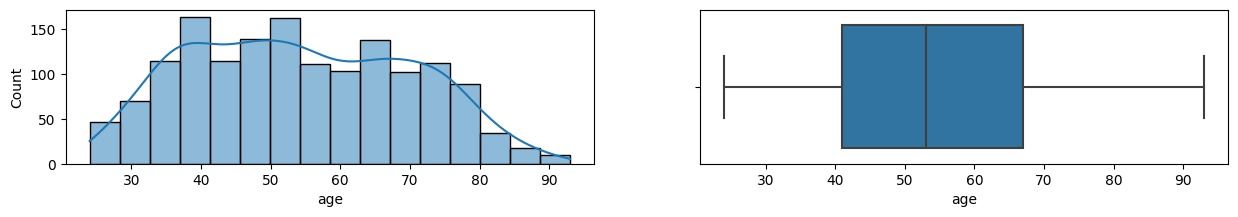

In [193]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df.age, kde=True, ax=axs[0])
sns.boxplot(x= 'age', data=df, ax=axs[1])

<Axes: xlabel='economic.cond.national'>

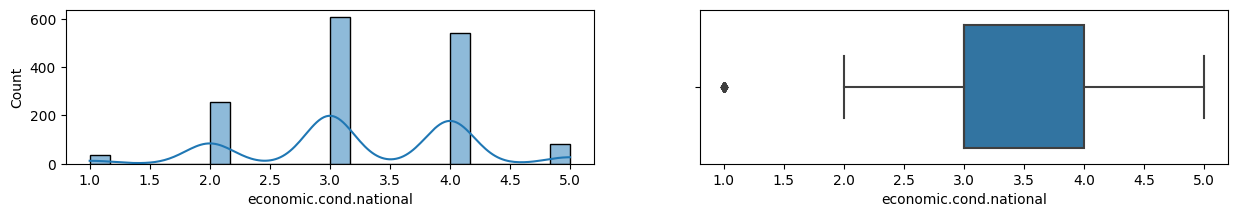

In [194]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["economic.cond.national"], kde=True, ax=axs[0])
sns.boxplot(x= 'economic.cond.national', data=df, ax=axs[1])

<Axes: xlabel='economic.cond.household'>

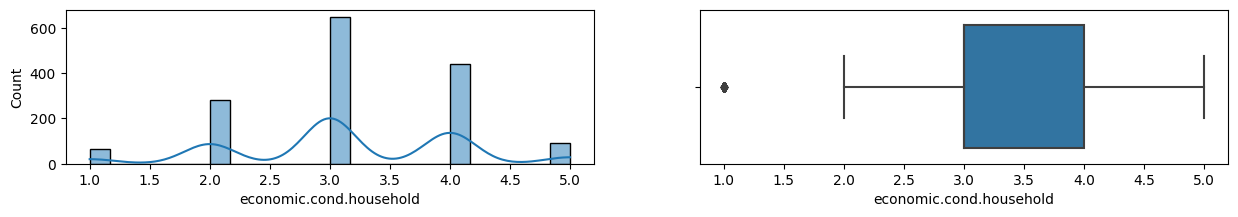

In [195]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["economic.cond.household"], kde=True, ax=axs[0])
sns.boxplot(x= 'economic.cond.household', data=df, ax=axs[1])

<Axes: xlabel='Blair'>

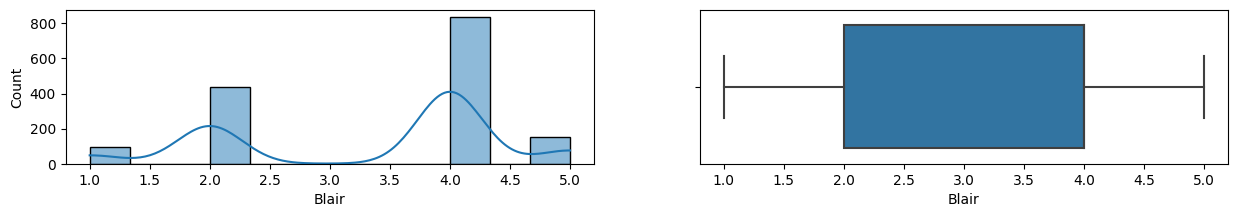

In [196]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["Blair"], kde=True, ax=axs[0])
sns.boxplot(x= 'Blair', data=df, ax=axs[1])

<Axes: xlabel='Hague'>

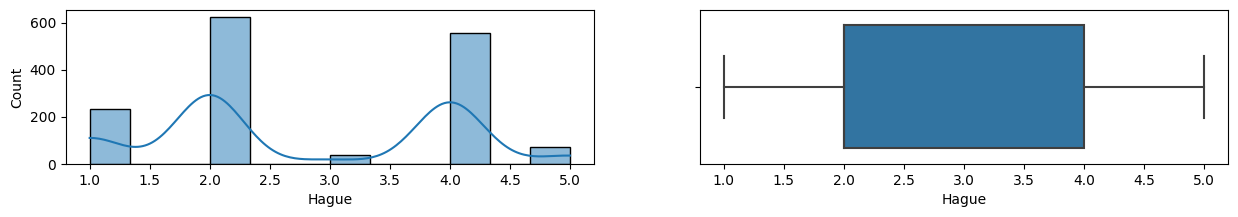

In [197]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["Hague"], kde=True, ax=axs[0])
sns.boxplot(x= 'Hague', data=df, ax=axs[1])

<Axes: xlabel='Europe'>

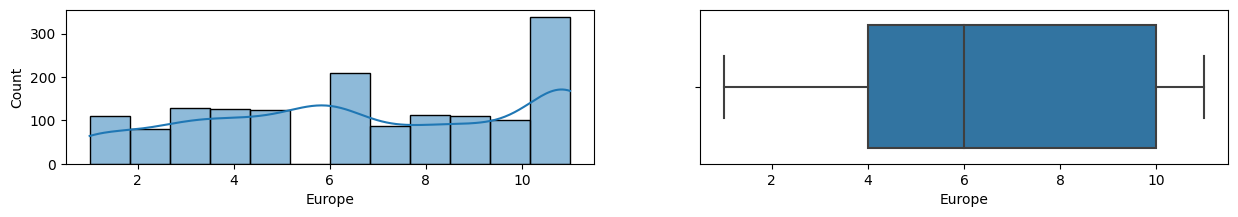

In [198]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["Europe"], kde=True, ax=axs[0])
sns.boxplot(x= 'Europe', data=df, ax=axs[1])

<Axes: xlabel='political.knowledge'>

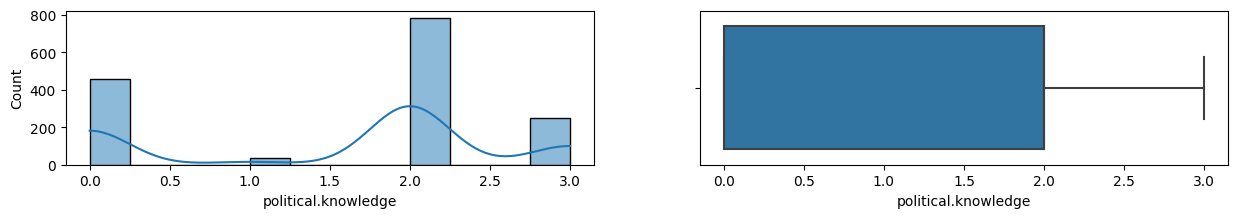

In [199]:
fig_dims = (15, 2)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=fig_dims)
sns.histplot(df["political.knowledge"], kde=True, ax=axs[0])
sns.boxplot(x= 'political.knowledge', data=df, ax=axs[1])

<Axes: xlabel='vote', ylabel='count'>

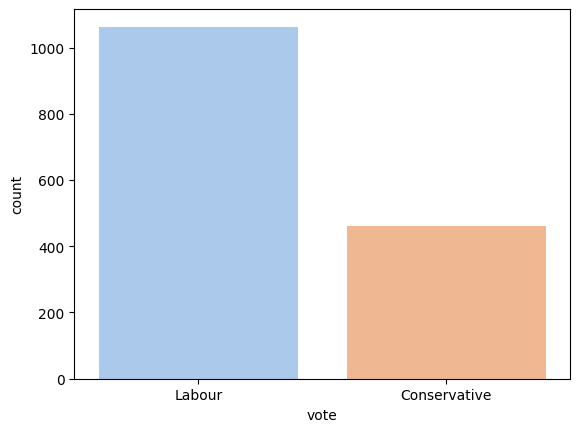

In [200]:
sns.countplot(x='vote', data=df, palette='pastel')

<Axes: xlabel='gender', ylabel='count'>

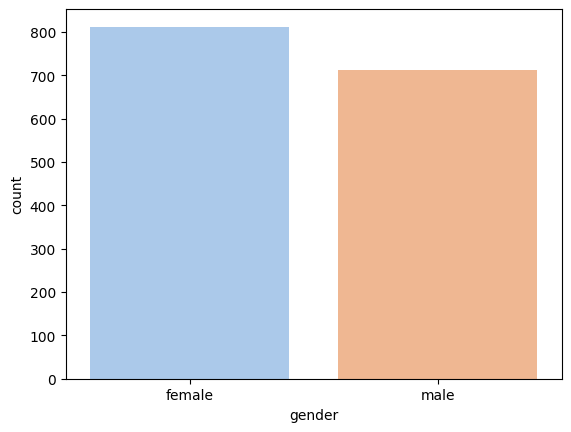

In [201]:
sns.countplot(x='gender', data=df, palette='pastel')

<Axes: xlabel='economic.cond.national'>

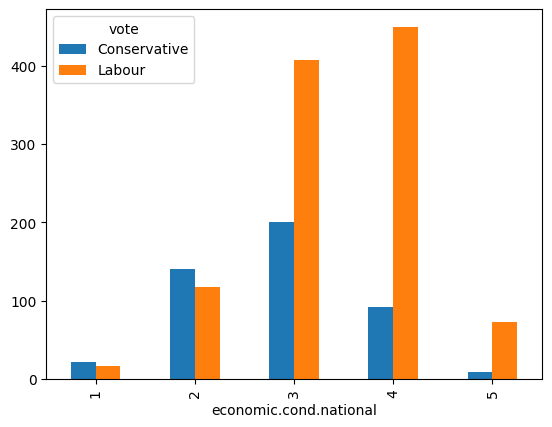

In [202]:
pd.crosstab(index=df['economic.cond.national'], columns=df['vote']).plot(kind='bar')

<Axes: xlabel='economic.cond.household'>

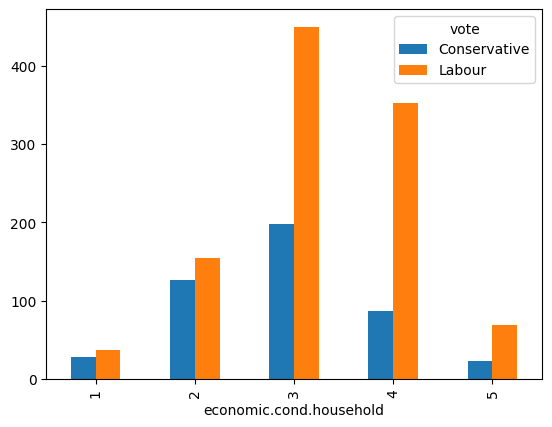

In [203]:
pd.crosstab(index=df['economic.cond.household'], columns=df['vote']).plot(kind='bar')

<Axes: xlabel='Blair'>

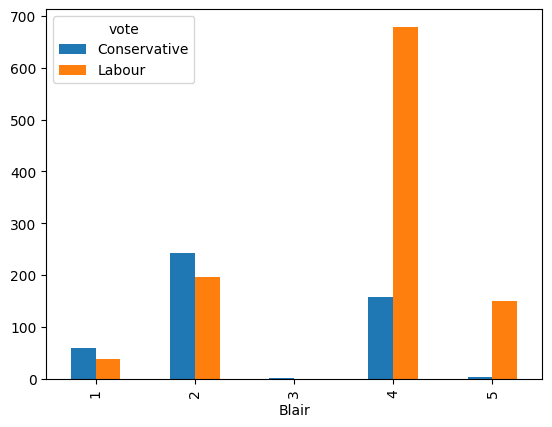

In [204]:
pd.crosstab(index=df['Blair'], columns=df['vote']).plot(kind='bar')

<Axes: xlabel='Hague'>

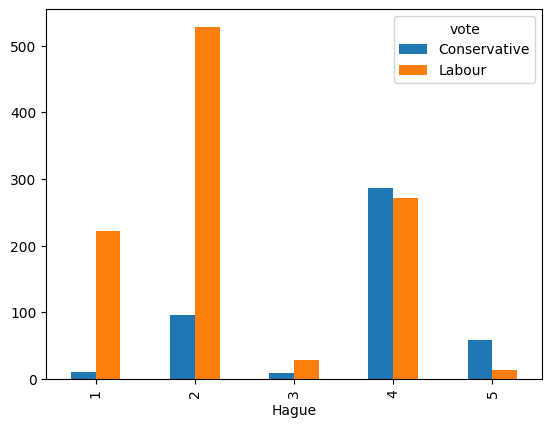

In [205]:
pd.crosstab(index=df['Hague'], columns=df['vote']).plot(kind='bar')

<Axes: xlabel='Europe'>

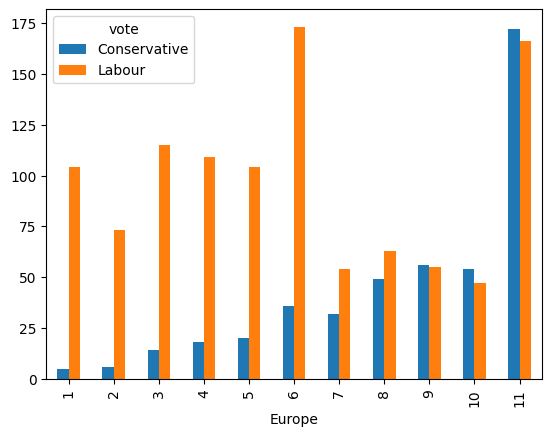

In [206]:
pd.crosstab(index=df['Europe'], columns=df['vote']).plot(kind='bar')

<Axes: xlabel='political.knowledge'>

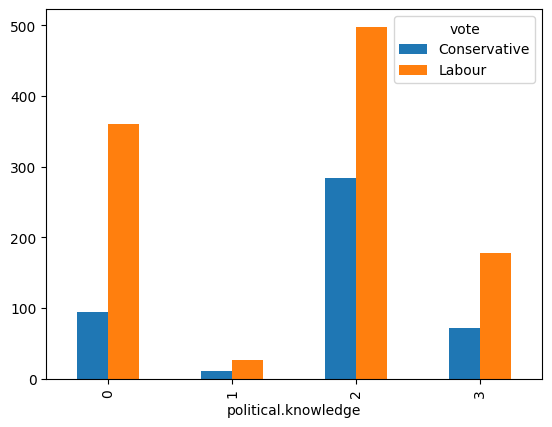

In [207]:
pd.crosstab(index=df['political.knowledge'], columns=df['vote']).plot(kind='bar')

In [208]:
pd.crosstab(index=df['gender'], columns=df['vote'])

vote,Conservative,Labour
gender,,
female,259,553
male,203,510


<Axes: xlabel='gender'>

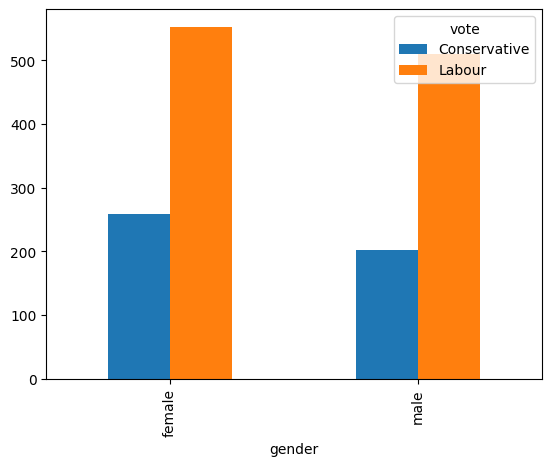

In [209]:
pd.crosstab(index=df['gender'], columns=df['vote']).plot(kind='bar')

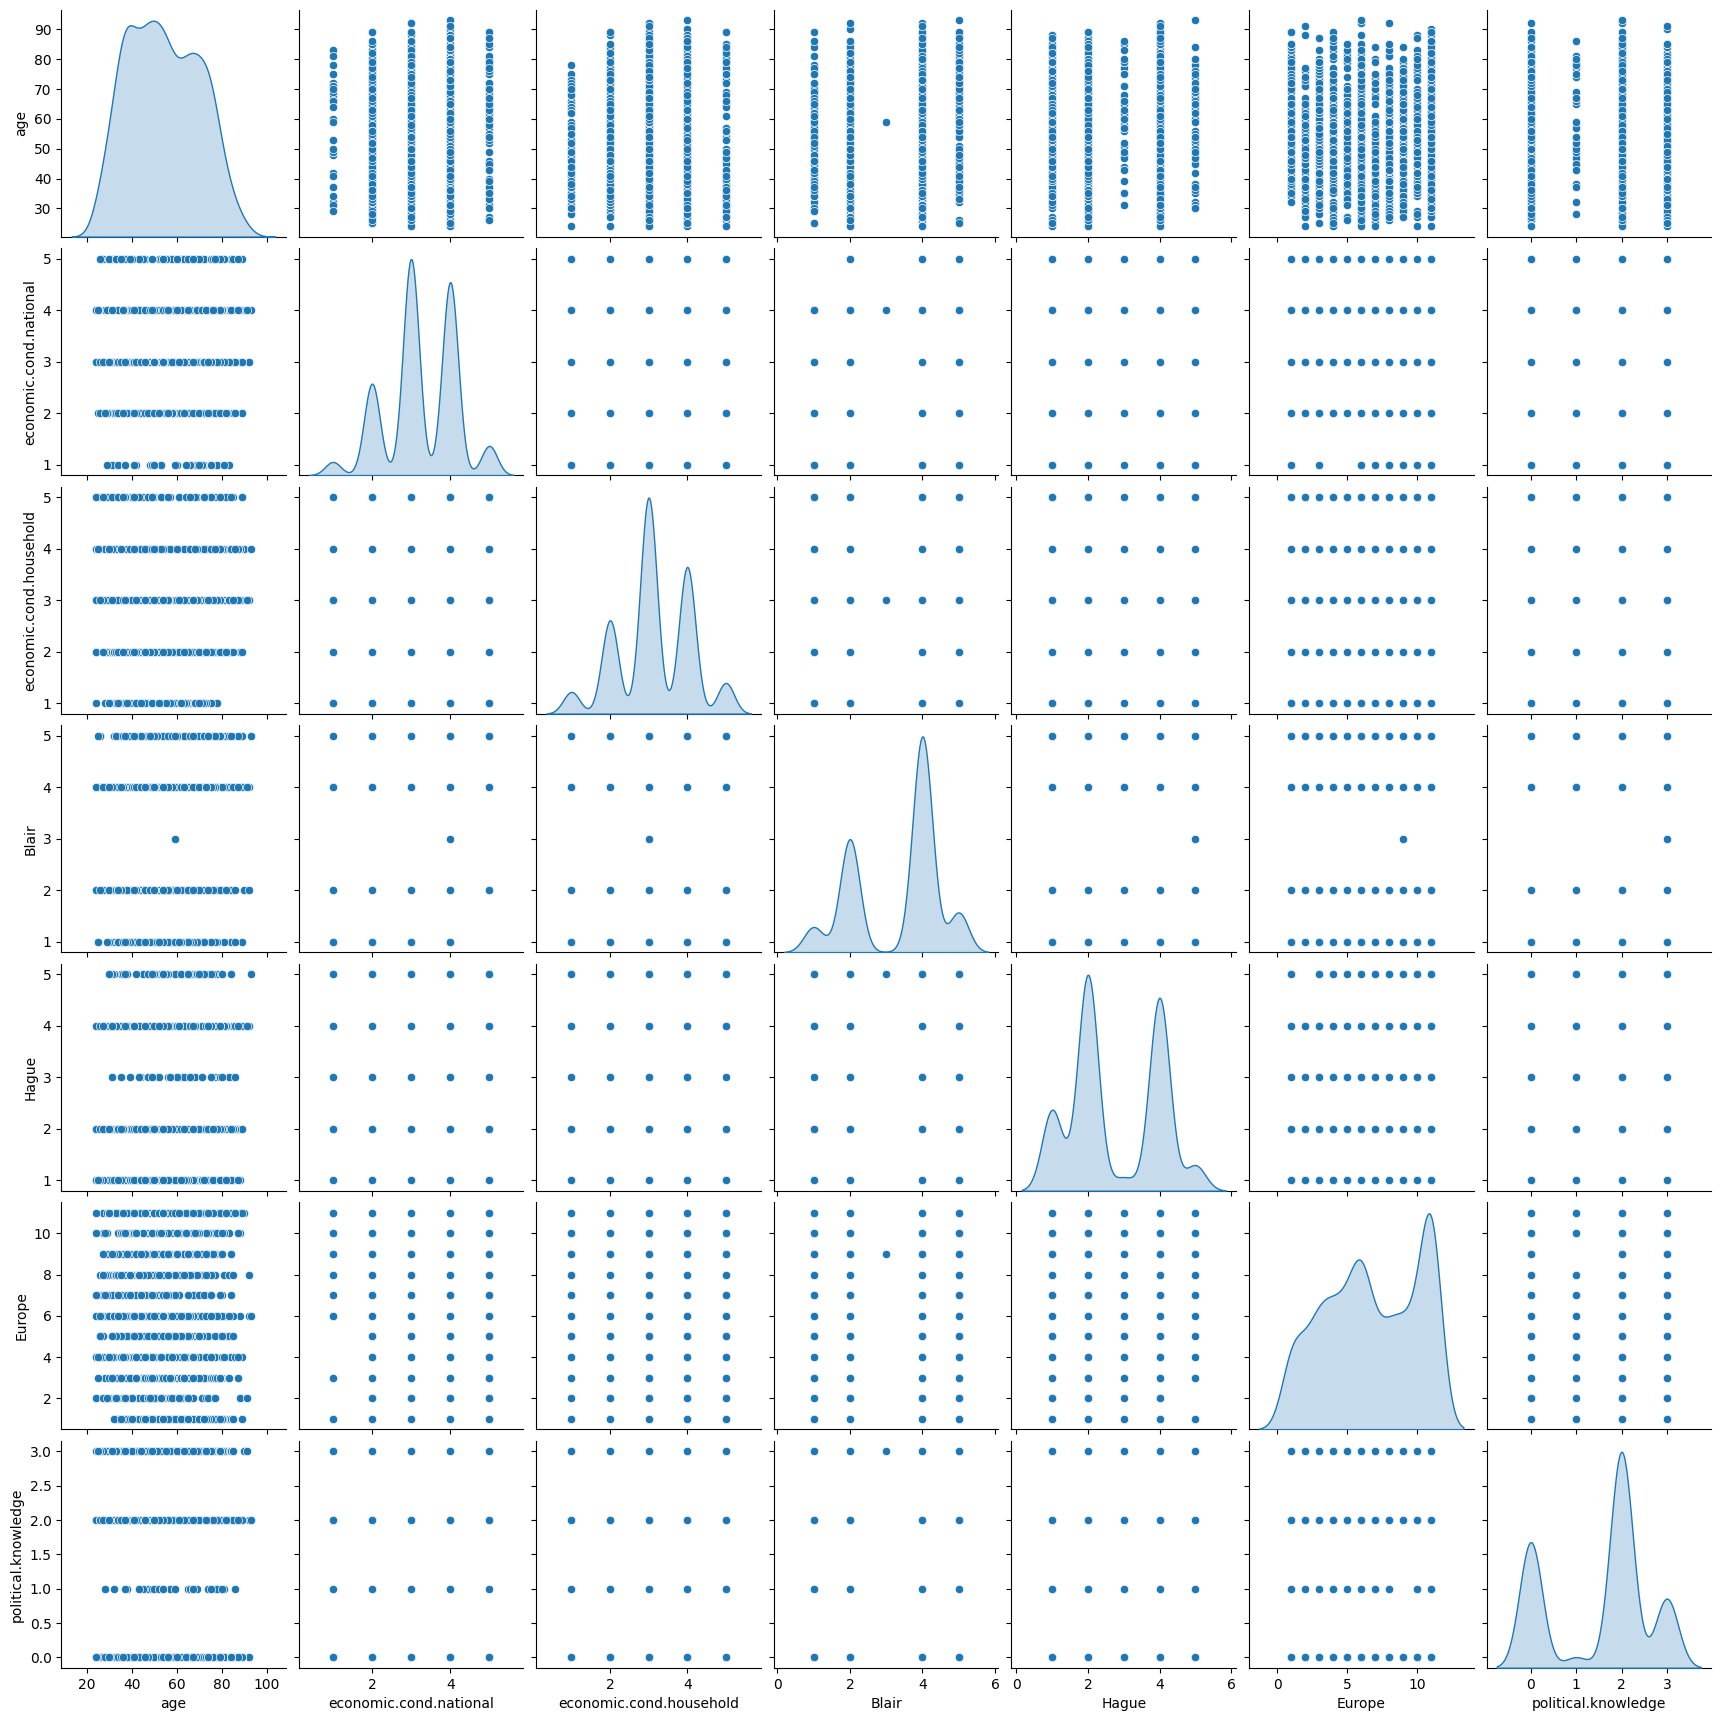

In [210]:
sns.pairplot(df, diag_kind="kde")

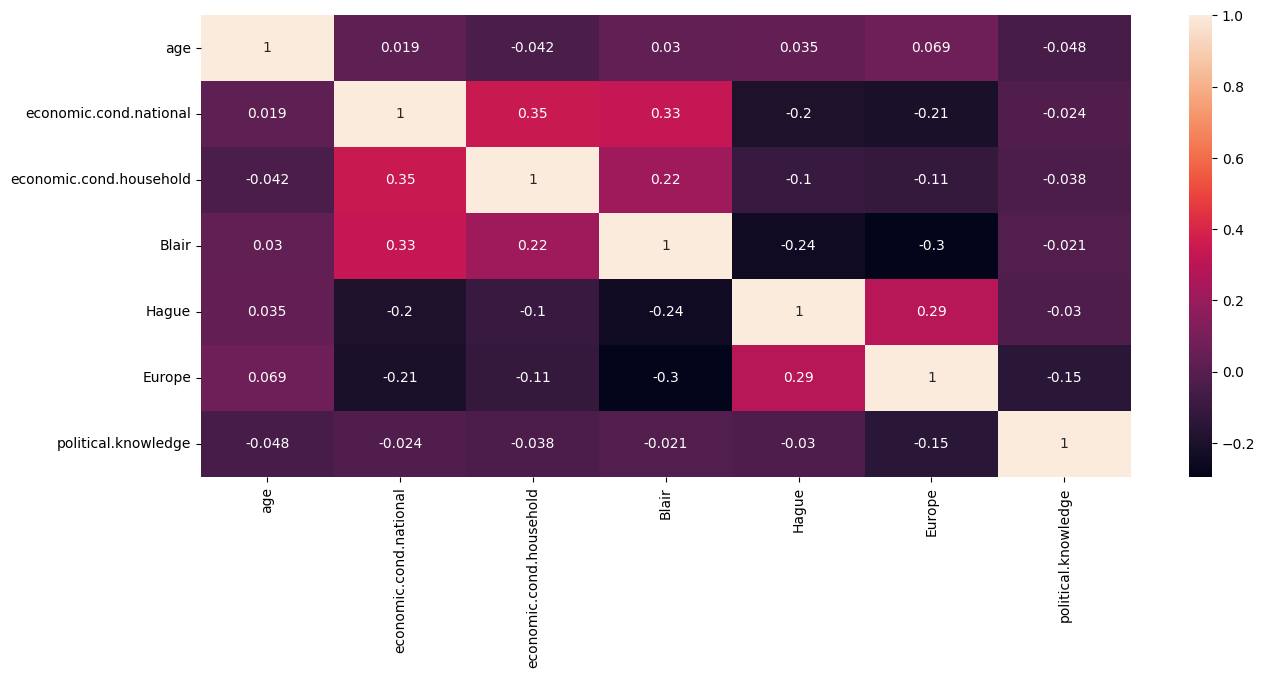

In [211]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 6))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [212]:
df.describe()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
count,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000,1525.000000
mean,54.182295,3.245902,3.140328,3.334426,2.746885,6.728525,1.542295
std,15.711209,0.880969,0.929951,1.174824,1.230703,3.297538,1.083315
min,24.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,41.000000,3.000000,3.000000,2.000000,2.000000,4.000000,0.000000
50%,53.000000,3.000000,3.000000,4.000000,2.000000,6.000000,2.000000
75%,67.000000,4.000000,4.000000,4.000000,4.000000,10.000000,2.000000
max,93.000000,5.000000,5.000000,5.000000,5.000000,11.000000,3.000000


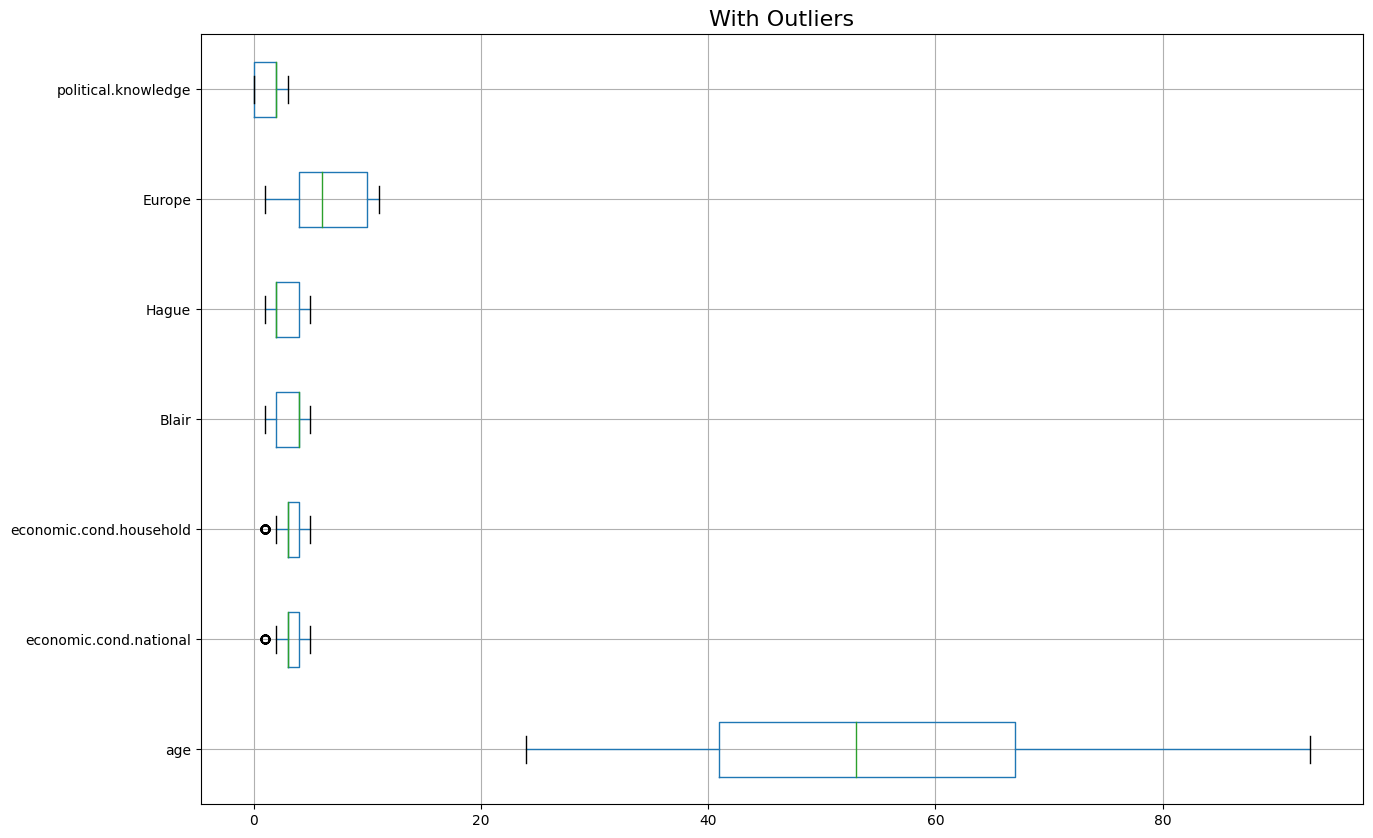

In [213]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [214]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [215]:
lr,ur=remove_outlier(df['economic.cond.national'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['economic.cond.national']=np.where(df['economic.cond.national']>ur,ur,df['economic.cond.national'])
df['economic.cond.national']=np.where(df['economic.cond.national']<lr,lr,df['economic.cond.national'])

Lower Range : 1.5 
Upper Range : 5.5


In [216]:
lr,ur=remove_outlier(df['economic.cond.household'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df['economic.cond.household']=np.where(df['economic.cond.household']>ur,ur,df['economic.cond.household'])
df['economic.cond.household']=np.where(df['economic.cond.household']<lr,lr,df['economic.cond.household'])

Lower Range : 1.5 
Upper Range : 5.5


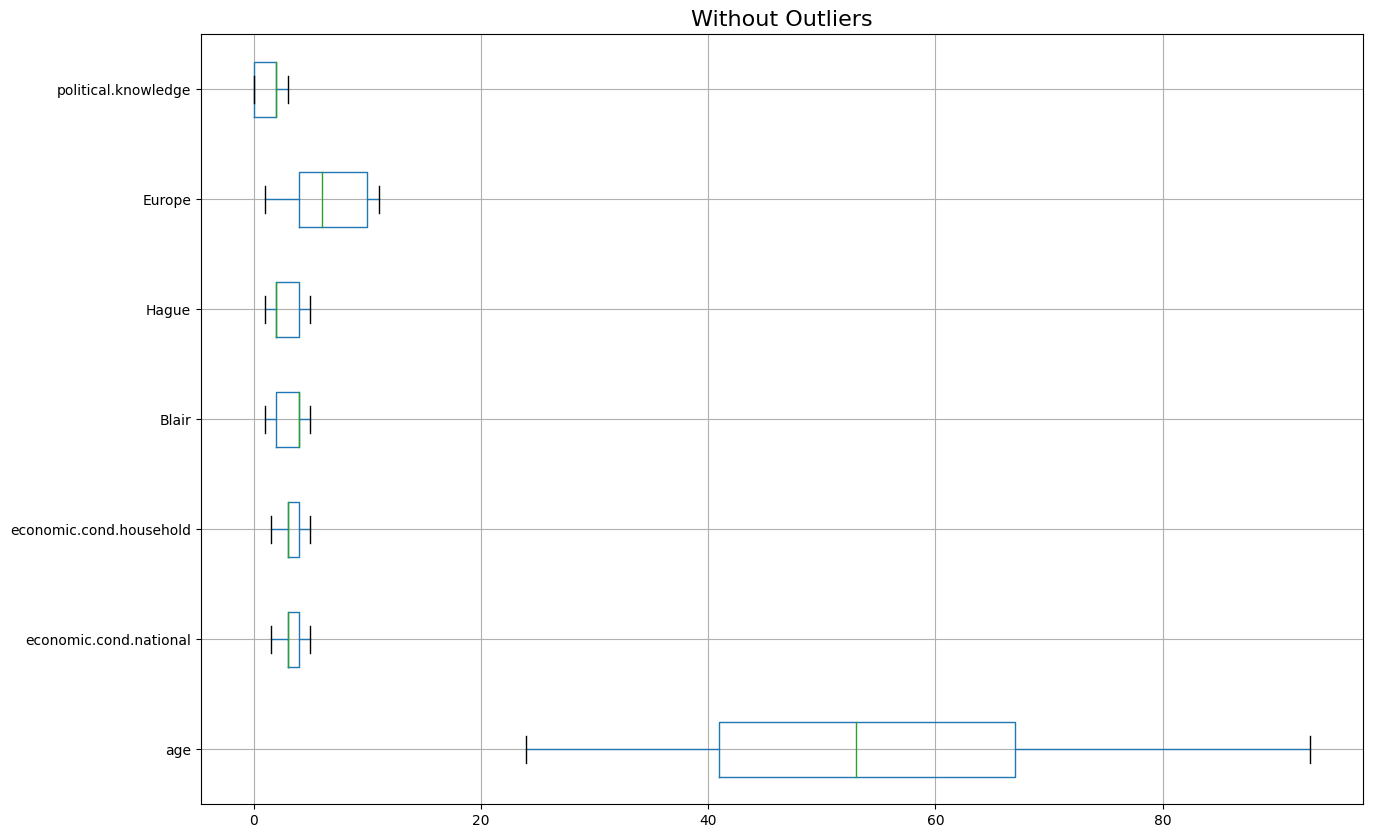

In [217]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(15,10))
df[cont].boxplot(vert=0)
plt.title('Without Outliers',fontsize=16)
plt.show()

In [218]:
df.corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.022194,-0.047149,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.022194,1.000000,0.342942,0.324402,-0.198091,-0.206858,-0.029395
economic.cond.household,-0.047149,0.342942,1.000000,0.216123,-0.101243,-0.114202,-0.039803
Blair,0.030218,0.324402,0.216123,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.198091,-0.101243,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.206858,-0.114202,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.029395,-0.039803,-0.020917,-0.030354,-0.152364,1.000000


In [219]:
df['gender'] = df['gender'].replace({'female':0,'male':1})
df['gender'].value_counts()

0    812
1    713
Name: gender, dtype: int64

In [220]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['vote']
['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge', 'gender']


In [221]:
from scipy.stats import zscore
data_scaled=df[num].apply(zscore)

In [222]:
data_scaled.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.711973,-0.302622,-0.182644,0.566716,-1.419886,-1.434426,0.422643,-0.937059
1,-1.157661,0.870182,0.947305,0.566716,1.018544,-0.524358,0.422643,1.067169
2,-1.221331,0.870182,0.947305,1.418187,-0.607076,-1.131070,0.422643,1.067169
3,-1.921698,0.870182,-1.312594,-1.136225,-1.419886,-0.827714,-1.424148,-0.937059
4,-0.839313,-1.475425,-1.312594,-1.987695,-1.419886,-0.221002,0.422643,1.067169


In [223]:
df_dummy = pd.get_dummies(df,columns=cat, drop_first=True)
df_dummy

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,vote_Labour
0,43,3.0,3.0,4,1,2,2,0,1
1,36,4.0,4.0,4,4,5,2,1,1
2,35,4.0,4.0,5,2,3,2,1,1
3,24,4.0,2.0,2,1,4,0,0,1
4,41,2.0,2.0,1,1,6,2,1,1
...,...,...,...,...,...,...,...,...,...
1520,67,5.0,3.0,2,4,11,3,1,0
1521,73,2.0,2.0,4,4,8,2,1,0
1522,37,3.0,3.0,5,4,2,2,1,1
1523,61,3.0,3.0,1,4,11,2,1,0


In [224]:
X = df_dummy.drop('vote_Labour', axis=1)
y = df_dummy['vote_Labour']

In [225]:
from sklearn.model_selection import train_test_split

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1,stratify=df_dummy['vote_Labour'])

In [227]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)
print('Total Obs',1067+458)

X_train (1067, 8)
X_test (458, 8)
y_train (1067,)
y_test (458,)
Total Obs 1525


In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [229]:
lr_model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
lr_model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [230]:
print('accuracy for train data using Logistic Regression:',round(lr_model.score(X_train, y_train),3))
print('\naccuracy for test data using Logistic Regression:',round(lr_model.score(X_test, y_test),3))

accuracy for train data using Logistic Regression: 0.83

accuracy for test data using Logistic Regression: 0.849


In [231]:
y_predict_train = lr_model.predict(X_train)
lr_model_score_predict = lr_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " , lr_model_score_predict)
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))

Accuracy/model score (train data) :  0.8303655107778819
[[212 111]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       323
           1       0.86      0.91      0.88       744

    accuracy                           0.83      1067
   macro avg       0.81      0.78      0.79      1067
weighted avg       0.83      0.83      0.83      1067



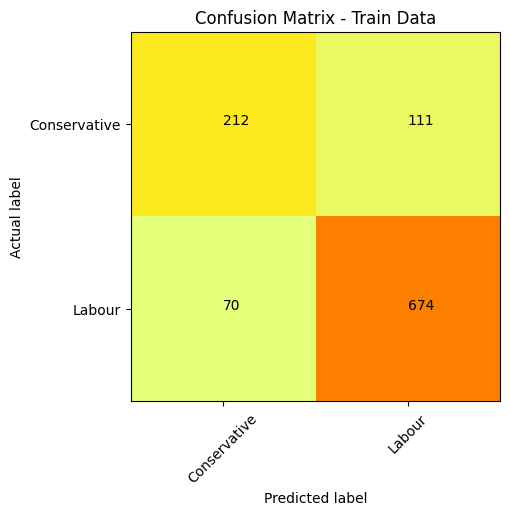

In [232]:
cm = metrics.confusion_matrix(y_train, y_predict_train)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.877


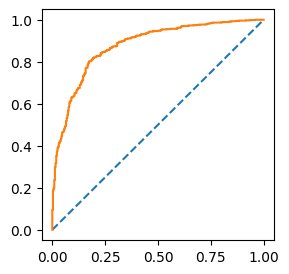

In [233]:
plt.figure(figsize=(3,3))
probs = lr_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [234]:
y_predict_test = lr_model.predict(X_test)
lr_model_score = lr_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,lr_model_score)
print(metrics.confusion_matrix(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))

Accuracy/model score (test data) :  0.8493449781659389
[[ 94  45]
 [ 24 295]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



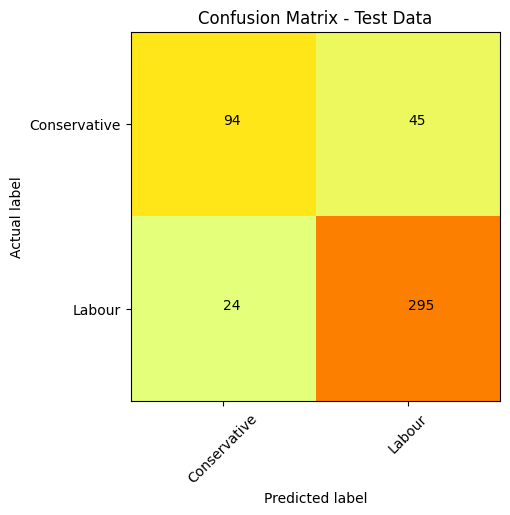

In [235]:
cm = metrics.confusion_matrix(y_test, y_predict_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.915


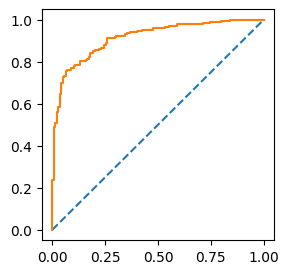

In [236]:
plt.figure(figsize=(3,3))
probs = lr_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [237]:
feature_imp = pd.DataFrame(columns=['feature','coef'])
coefficients = lr_model.coef_
feature_names = list(X_train.columns)
for feature_name, coef in zip(feature_names, coefficients[0]):
    feature_imp = feature_imp.append({'feature': feature_name,'coef':coef},ignore_index=True)

feature_imp.sort_values(by='coef', ascending=False)

,feature,coef
3,Blair,0.532557
1,economic.cond.national,0.394197
7,gender,0.200809
2,economic.cond.household,0.088280
0,age,-0.018962
5,Europe,-0.206773
6,political.knowledge,-0.372026
4,Hague,-0.854153


In [238]:
y.value_counts()

1    1063
0     462
Name: vote_Labour, dtype: int64

In [239]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [240]:
lda_clf = LinearDiscriminantAnalysis()
lda_model=lda_clf.fit(X_train,y_train)

In [241]:
print('Accuracy for train data using LDA :',round(lda_model.score(X_train, y_train),3))
print('Accuracy for test data data using LDA :',round(lda_model.score(X_test, y_test),3))

Accuracy for train data using LDA : 0.828
Accuracy for test data data using LDA : 0.847


In [242]:
y_predict_train = lda_model.predict(X_train)
lda_model_score_predict = lda_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,lda_model_score_predict)
print(metrics.confusion_matrix(y_train, y_predict_train))
print(metrics.classification_report(y_train, y_predict_train))

Accuracy/model score (train data) :  0.8275538894095595
[[218 105]
 [ 79 665]]
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       323
           1       0.86      0.89      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.78      0.79      1067
weighted avg       0.82      0.83      0.83      1067



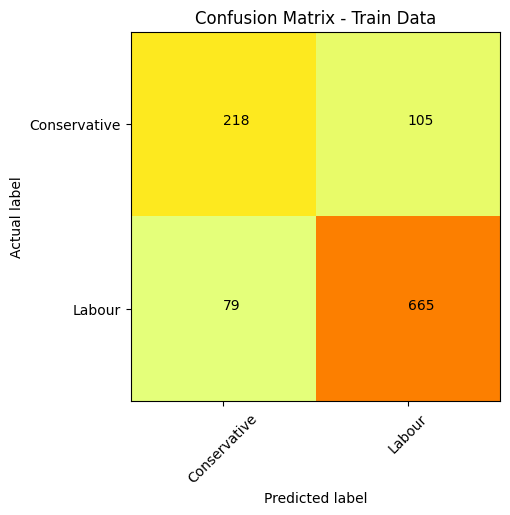

In [243]:
cm = metrics.confusion_matrix(y_train, y_predict_train)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.877


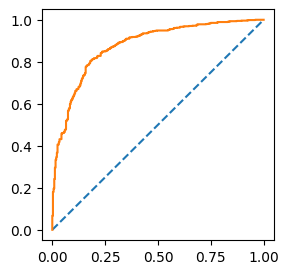

In [244]:
plt.figure(figsize=(3,3))
probs = lda_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [245]:
y_predict_test = lda_model.predict(X_test)
lda_model_score_predict = lda_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,lda_model_score_predict)
print(metrics.confusion_matrix(y_test, y_predict_test))
print(metrics.classification_report(y_test, y_predict_test))

Accuracy/model score (test data) :  0.8471615720524017
[[ 98  41]
 [ 29 290]]
              precision    recall  f1-score   support

           0       0.77      0.71      0.74       139
           1       0.88      0.91      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.81      0.81       458
weighted avg       0.84      0.85      0.85       458



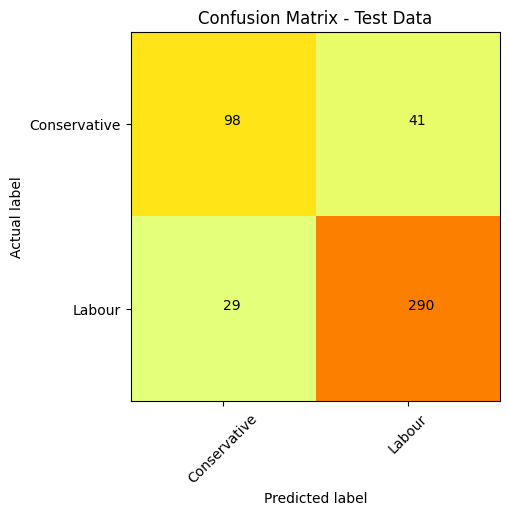

In [246]:
cm = metrics.confusion_matrix(y_test, y_predict_test)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.916


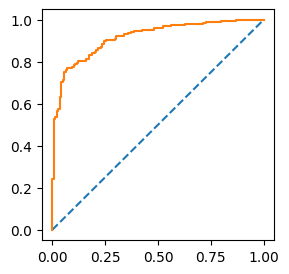

In [247]:
plt.figure(figsize=(3,3))
probs = lda_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [248]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3.0,3.0,4,1,2,2,0
1,36,4.0,4.0,4,4,5,2,1
2,35,4.0,4.0,5,2,3,2,1
3,24,4.0,2.0,2,1,4,0,0
4,41,2.0,2.0,1,1,6,2,1


In [249]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [250]:
print('Accuracy for train data using KNN :',round(KNN_model.score(X_train, y_train),3))
print('Accuracy for test data using KNN :',round(KNN_model.score(X_test, y_test),3))

Accuracy for train data using KNN : 0.841
Accuracy for test data using KNN : 0.828


In [251]:
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.8406747891283973
[[222 101]
 [ 69 675]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       323
           1       0.87      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



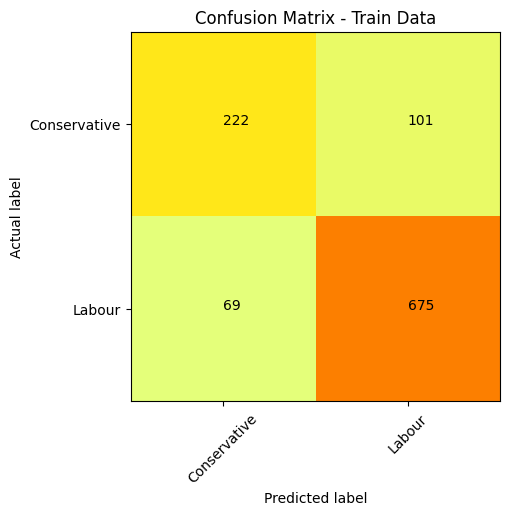

In [252]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.919


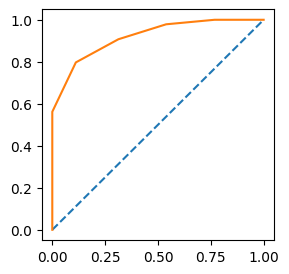

In [253]:
plt.figure(figsize=(3,3))
probs = KNN_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [254]:
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8275109170305677
[[ 86  53]
 [ 26 293]]
              precision    recall  f1-score   support

           0       0.77      0.62      0.69       139
           1       0.85      0.92      0.88       319

    accuracy                           0.83       458
   macro avg       0.81      0.77      0.78       458
weighted avg       0.82      0.83      0.82       458



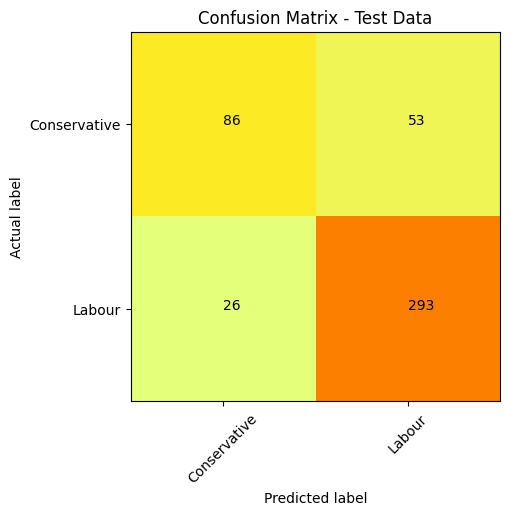

In [255]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.873


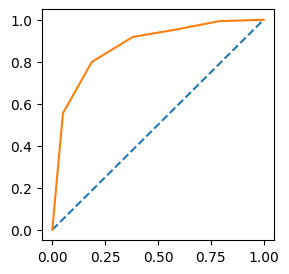

In [256]:
plt.figure(figsize=(3,3))
probs = KNN_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [257]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [258]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [331]:
print('Accuracy for train data using NB :',round(NB_model.score(X_train, y_train),3))
print('Accuracy for test data using NB :',round(NB_model.score(X_test, y_test),3))

Accuracy for train data using NB : 0.827
Accuracy for test data using NB : 0.847


In [332]:
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.8266166822867854
[[226  97]
 [ 88 656]]
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       323
           1       0.87      0.88      0.88       744

    accuracy                           0.83      1067
   macro avg       0.80      0.79      0.79      1067
weighted avg       0.83      0.83      0.83      1067



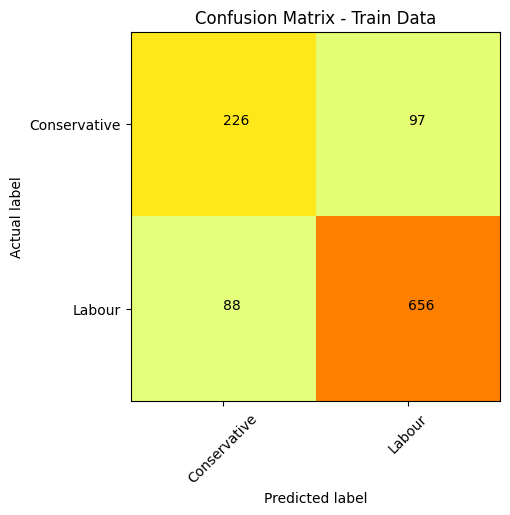

In [260]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.875


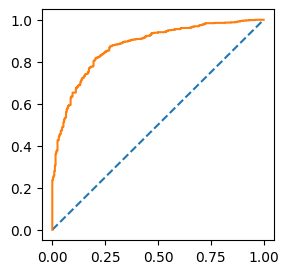

In [261]:
plt.figure(figsize=(3,3))
probs = NB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [333]:
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8471615720524017
[[102  37]
 [ 33 286]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       139
           1       0.89      0.90      0.89       319

    accuracy                           0.85       458
   macro avg       0.82      0.82      0.82       458
weighted avg       0.85      0.85      0.85       458



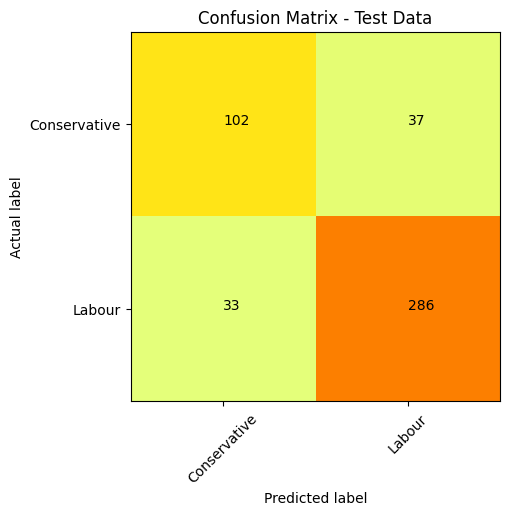

In [263]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.910


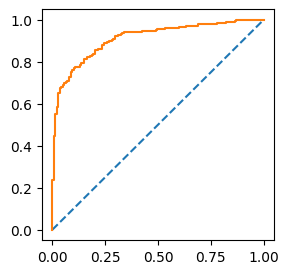

In [264]:
plt.figure(figsize=(3,3))
probs = NB_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

In [265]:
NB_model.score(X_train, y_train)

0.8266166822867854

In [266]:
NB_model.score(X_test, y_test)

0.8471615720524017

## 1.6 - Tuning, Bagging and Boosting

##Bagging - Decision Tree Classifier

In [267]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=100,random_state=1)
Bagging_model.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=1)

In [334]:
print('Accuracy for train data using Bagging (DTC) :',round(Bagging_model.score(X_train, y_train),3))
print('Accuracy for test data using Bagging (DTC) :',round(Bagging_model.score(X_test, y_test),3))

Accuracy for train data using Bagging (DTC) : 0.999
Accuracy for test data using Bagging (DTC) : 0.821


In [335]:
y_train_predict = Bagging_model.predict(X_train)
model_score =Bagging_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



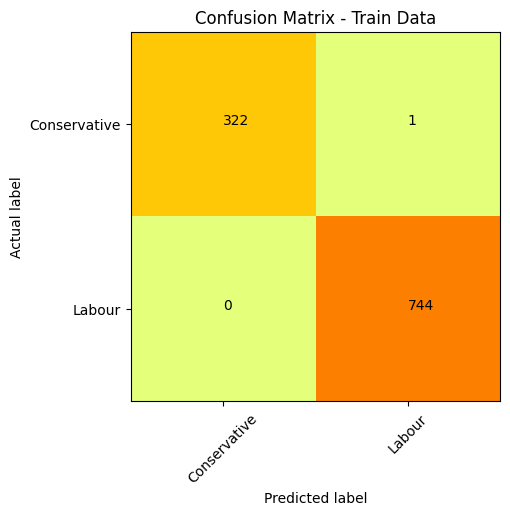

In [269]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 1.000


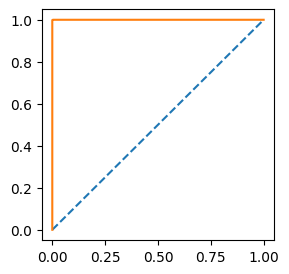

In [270]:
plt.figure(figsize=(3,3))
probs = Bagging_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [336]:
y_test_predict = Bagging_model.predict(X_test)
model_score = Bagging_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8209606986899564
[[ 90  49]
 [ 33 286]]
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       139
           1       0.85      0.90      0.87       319

    accuracy                           0.82       458
   macro avg       0.79      0.77      0.78       458
weighted avg       0.82      0.82      0.82       458



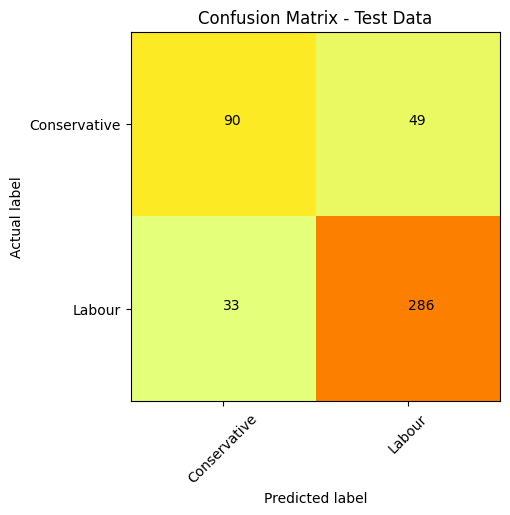

In [272]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.895


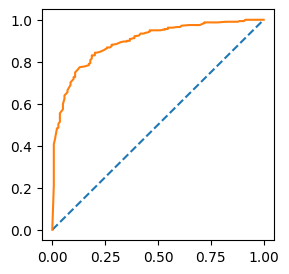

In [273]:
plt.figure(figsize=(3,3))
probs = Bagging_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

##ADA Boost

In [274]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [346]:
print('Accuracy for train data using ADB :',round(ADB_model.score(X_train, y_train),3))
print('Accuracy for test data using ADB :',round(ADB_model.score(X_test, y_test),3))

Accuracy for train data using ADB : 0.844
Accuracy for test data using ADB : 0.836


In [340]:
y_train_predict = ADB_model.predict(X_train)
model_score = ADB_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.8444236176194939
[[227  96]
 [ 70 674]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       323
           1       0.88      0.91      0.89       744

    accuracy                           0.84      1067
   macro avg       0.82      0.80      0.81      1067
weighted avg       0.84      0.84      0.84      1067



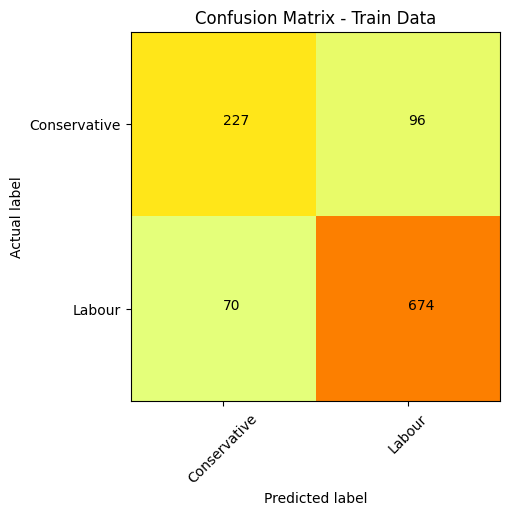

In [276]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.902


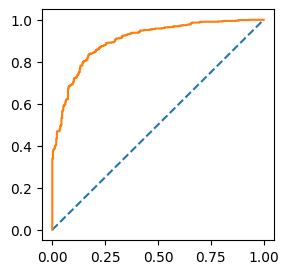

In [277]:
plt.figure(figsize=(3,3))
probs = ADB_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [341]:
y_test_predict = ADB_model.predict(X_test)
model_score = ADB_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8362445414847162
[[ 94  45]
 [ 30 289]]
              precision    recall  f1-score   support

           0       0.76      0.68      0.71       139
           1       0.87      0.91      0.89       319

    accuracy                           0.84       458
   macro avg       0.81      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



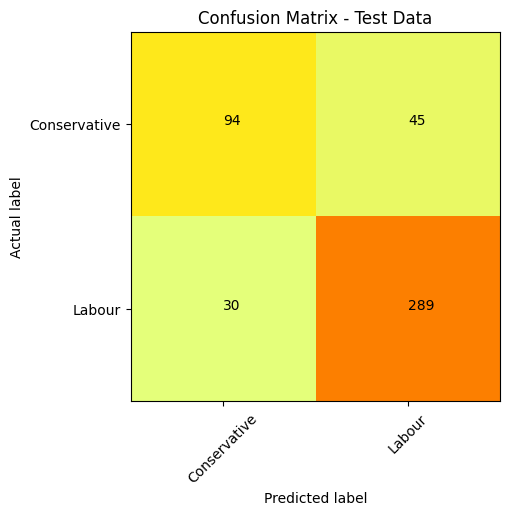

In [279]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.906


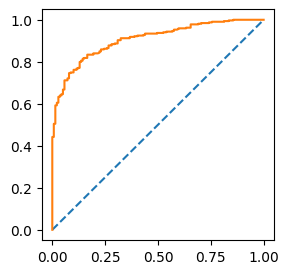

In [280]:
plt.figure(figsize=(3,3))
probs = ADB_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

## Gradient Boost

In [281]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [347]:
print('Accuracy for train data using Gradient Boosting :',round(gbcl.score(X_train, y_train),3))
print('Accuracy for test data using Gradient Boosting :',round(gbcl.score(X_test, y_test),3))

Accuracy for train data using Gradient Boosting : 0.888
Accuracy for test data using Gradient Boosting : 0.838


In [342]:
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.887535145267104
[[246  77]
 [ 43 701]]
              precision    recall  f1-score   support

           0       0.85      0.76      0.80       323
           1       0.90      0.94      0.92       744

    accuracy                           0.89      1067
   macro avg       0.88      0.85      0.86      1067
weighted avg       0.89      0.89      0.89      1067



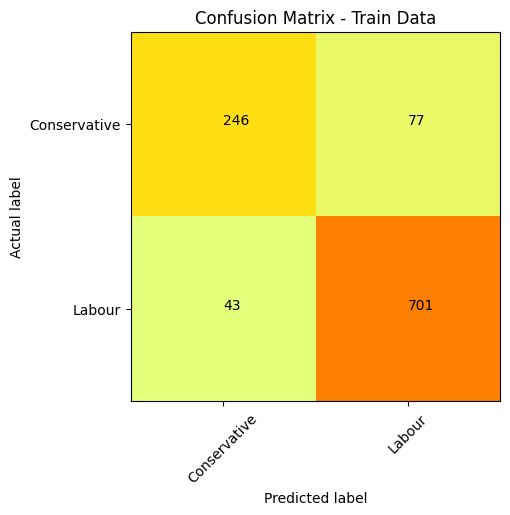

In [283]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.948


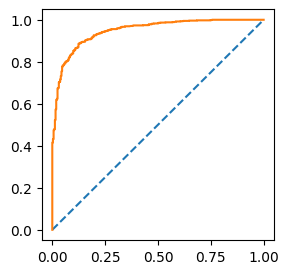

In [284]:
plt.figure(figsize=(3,3))
probs = gbcl.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [343]:
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8384279475982532
[[ 92  47]
 [ 27 292]]
              precision    recall  f1-score   support

           0       0.77      0.66      0.71       139
           1       0.86      0.92      0.89       319

    accuracy                           0.84       458
   macro avg       0.82      0.79      0.80       458
weighted avg       0.83      0.84      0.83       458



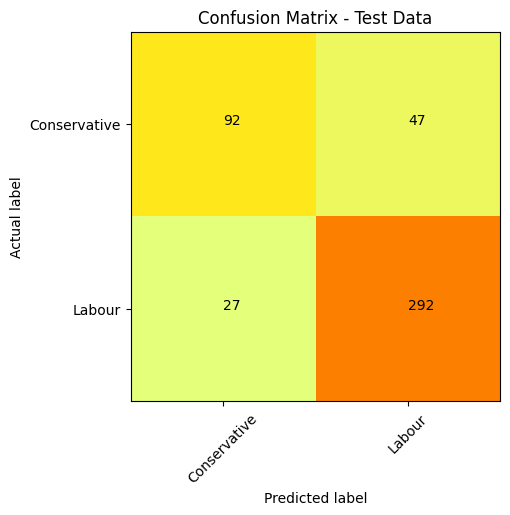

In [286]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.906


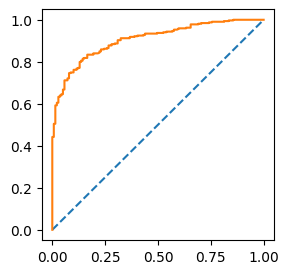

In [287]:
plt.figure(figsize=(3,3))
probs = ADB_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

## Random Forest

In [337]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [338]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [339]:
print('Accuracy for train data using Random Forest :',round(RF_model.score(X_train, y_train),3))
print('Accuracy for test data using Random Forest :',round(RF_model.score(X_test, y_test),3))

Accuracy for train data using Random Forest : 0.999
Accuracy for test data using Random Forest : 0.849


In [344]:
y_train_predict = RF_model.predict(X_train)
model_score =RF_model.score(X_train, y_train)
print("Accuracy/model score (train data) : " ,model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Accuracy/model score (train data) :  0.9990627928772259
[[322   1]
 [  0 744]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       323
           1       1.00      1.00      1.00       744

    accuracy                           1.00      1067
   macro avg       1.00      1.00      1.00      1067
weighted avg       1.00      1.00      1.00      1067



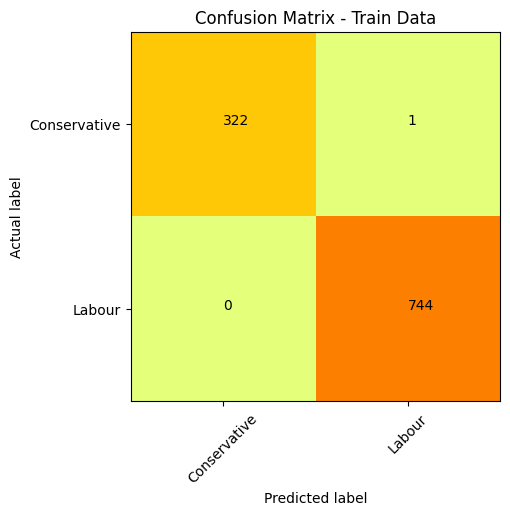

In [291]:
cm = metrics.confusion_matrix(y_train, y_train_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Train Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 1.000


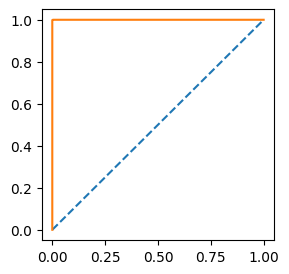

In [292]:
plt.figure(figsize=(3,3))
probs = RF_model.predict_proba(X_train)
probs = probs[:, 1]
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr, train_tpr);

In [345]:
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print("Accuracy/model score (test data) : " ,model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Accuracy/model score (test data) :  0.8493449781659389
[[ 94  45]
 [ 24 295]]
              precision    recall  f1-score   support

           0       0.80      0.68      0.73       139
           1       0.87      0.92      0.90       319

    accuracy                           0.85       458
   macro avg       0.83      0.80      0.81       458
weighted avg       0.85      0.85      0.85       458



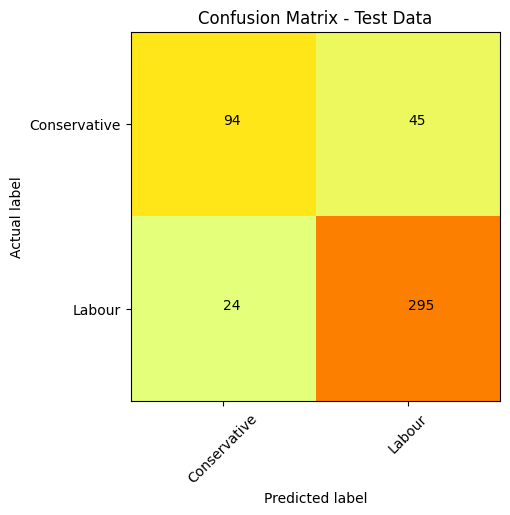

In [294]:
cm = metrics.confusion_matrix(y_test, y_test_predict)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Conservative','Labour']
plt.title('Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i][j]))

plt.show()

AUC: 0.913


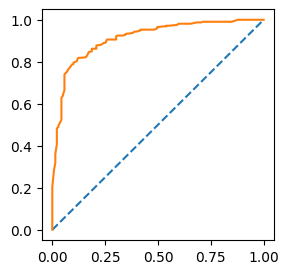

In [295]:
plt.figure(figsize=(3,3))
probs = RF_model.predict_proba(X_test)
probs = probs[:, 1]
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % test_auc)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr, test_tpr);

#Problem 2

##In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941

*   President Franklin D. Roosevelt in 1941
*   President John F. Kennedy in 1961
*   President Richard Nixon in 1973

In [296]:
import pandas as pd
import numpy as np
import nltk
nltk.download('inaugural')
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Package inaugural is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [297]:
Pre_speeches = pd.read_excel("/content/drive/MyDrive/Project_Speech.xlsx")

In [298]:
speech_roos = inaugural.raw('1941-Roosevelt.txt')
speech_ken = inaugural.raw('1961-Kennedy.txt')
speech_nik = inaugural.raw('1973-Nixon.txt')

In [299]:
char_count_roos = len(speech_roos)
char_count_ken = len(speech_ken)
char_count_nik = len(speech_nik)

In [300]:
print("Number of characters in Roosevelt Speech :", char_count_roos)

print("Number of characters in Kennedy Speech :", char_count_ken)

print("Number of characters in Nixon Speech :", char_count_nik)

Number of characters in Roosevelt Speech : 7571
Number of characters in Kennedy Speech : 7618
Number of characters in Nixon Speech : 9991


In [301]:
word_count_roos = len(inaugural.words('1941-Roosevelt.txt'))
word_count_ken = len(inaugural.words('1961-Kennedy.txt'))
word_count_nik = len(inaugural.words('1973-Nixon.txt'))

In [302]:
print("Number of words in Roosevelt Speech :", word_count_roos)

print("Number of words in Kennedy Speech :", word_count_ken)

print("Number of words in Nixon Speech :", word_count_nik)

Number of words in Roosevelt Speech : 1536
Number of words in Kennedy Speech : 1546
Number of words in Nixon Speech : 2028


In [303]:
sents_count_roos = len(inaugural.sents('1941-Roosevelt.txt'))
sents_count_ken = len(inaugural.sents('1961-Kennedy.txt'))
sents_count_nik = len(inaugural.sents('1973-Nixon.txt'))

In [304]:
print("Number of sentences in Roosevelt Speech :", sents_count_roos)

print("Number of sentences in Kennedy Speech :", sents_count_ken)

print("Number of sentences in Nixon Speech :", sents_count_nik)

Number of sentences in Roosevelt Speech : 68
Number of sentences in Kennedy Speech : 52
Number of sentences in Nixon Speech : 69


In [305]:
print("1941 Roosevelt Speech:")
print("Characters:", char_count_roos)
print("Words:", word_count_roos)
print("Sentences:", sents_count_roos)

1941 Roosevelt Speech:
Characters: 7571
Words: 1536
Sentences: 68


In [306]:
print("1961 Kennedy Speech:")
print("Characters:", char_count_ken)
print("Words:", word_count_ken)
print("Sentences:", sents_count_ken)

1961 Kennedy Speech:
Characters: 7618
Words: 1546
Sentences: 52


In [307]:
print("1973 Nixon Speech:")
print("Characters:", char_count_nik)
print("Words:", word_count_nik)
print("Sentences:", sents_count_nik)

1973 Nixon Speech:
Characters: 9991
Words: 2028
Sentences: 69


In [308]:
from tabulate import tabulate

In [309]:
data = [
    ['1941-Roosevelt', char_count_roos, word_count_roos, sents_count_roos],
    ['1961-Kennedy', char_count_ken, word_count_ken, sents_count_ken],
    ['1973-Nixon', char_count_nik, word_count_nik, sents_count_nik]
]

headers = ['Speech', 'Characters', 'Words', 'Sentences']
print(tabulate(data, headers=headers))

Speech            Characters    Words    Sentences
--------------  ------------  -------  -----------
1941-Roosevelt          7571     1536           68
1961-Kennedy            7618     1546           52
1973-Nixon              9991     2028           69


##2.2

In [310]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [311]:
Pre_speeches['Speech'] = Pre_speeches['Speech'].apply(lambda x: " ".join(x.lower() for x in x.split()))
Pre_speeches['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson, mr. speaker, mr. chief...
2    mr. vice president, mr. speaker, mr. chief jus...
Name: Speech, dtype: object

In [312]:
Pre_speeches['Speech'] = Pre_speeches['Speech'].str.replace('[^\w\s]','')
Pre_speeches['Speech'].head()

0    on each national day of inauguration since 178...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [313]:
stop = stopwords.words('english')
Pre_speeches['Speech'] = Pre_speeches['Speech'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Pre_speeches['Speech'].head()

0    national day inauguration since 1789 people re...
1    vice president johnson mr speaker mr chief jus...
2    mr vice president mr speaker mr chief justice ...
Name: Speech, dtype: object

In [314]:
from nltk.tokenize import word_tokenize
from collections import Counter

In [315]:
speeches_roos = Pre_speeches['Speech'].iloc[:1].tolist()
speeches_ken = Pre_speeches['Speech'].iloc[1:2].tolist()
speeches_nik = Pre_speeches['Speech'].iloc[2:3].tolist()

In [316]:
words_roos = [word_tokenize(speech.lower()) for speech in speeches_roos]
all_words_roos = [word for speech_words in words_roos for word in speech_words]

In [351]:
word_frequencies = Counter(all_words_roos)
sorted_frequencies_roos = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
for word, frequency in sorted_frequencies_roos[:3]:
    print(word, frequency)

nation 10
know 10
us 8


In [318]:
top_words_roos = sorted_frequencies_roos
top_words = [word for word, frequency in top_words_roos]

Word Cloud for Roosevelt Speech (after cleaning)!!


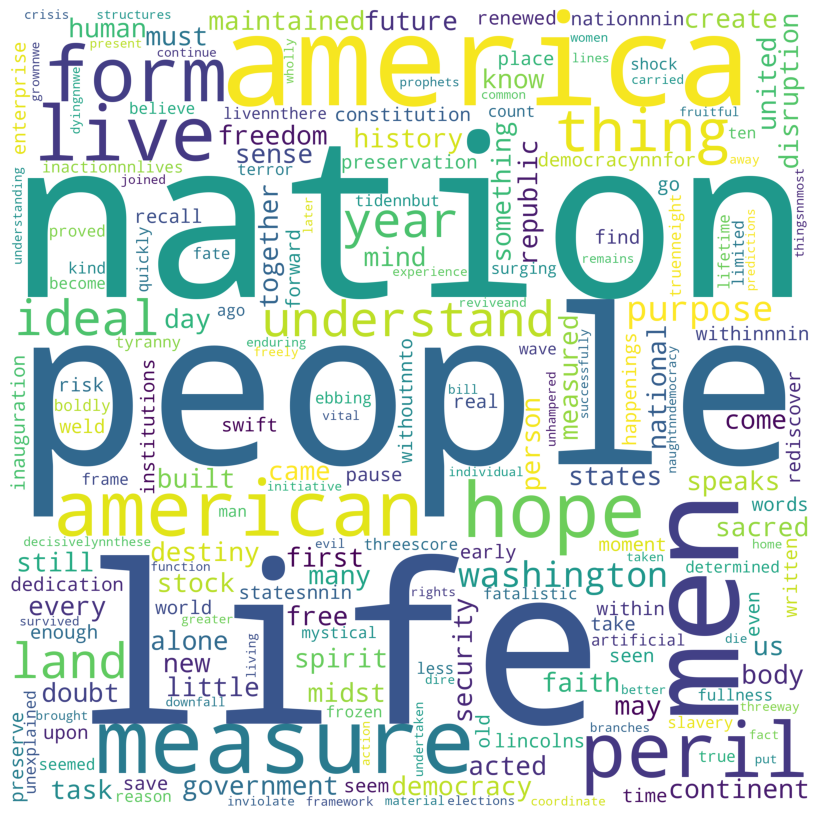

In [319]:
from wordcloud import WordCloud
wordcloud_roos = WordCloud(width = 3000, height = 3000,
                background_color ='white',
                min_font_size = 10, random_state=100).generate(' '.join(top_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_roos)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

print("Word Cloud for Roosevelt Speech (after cleaning)!!")
plt.show()

In [320]:
words_ken = [word_tokenize(speech.lower()) for speech in speeches_ken]
all_words_ken = [word for speech_words in words_ken for word in speech_words]

In [352]:
word_frequencies = Counter(all_words_ken)
sorted_frequencies_ken = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
for word, frequency in sorted_frequencies_ken[:3]:
    print(word, frequency)

let 11
us 11
sides 8


In [322]:
top_words_ken = sorted_frequencies_ken
top_words = [word for word, frequency in top_words_ken]

Word Cloud for Kennedy Speech (after cleaning)!!


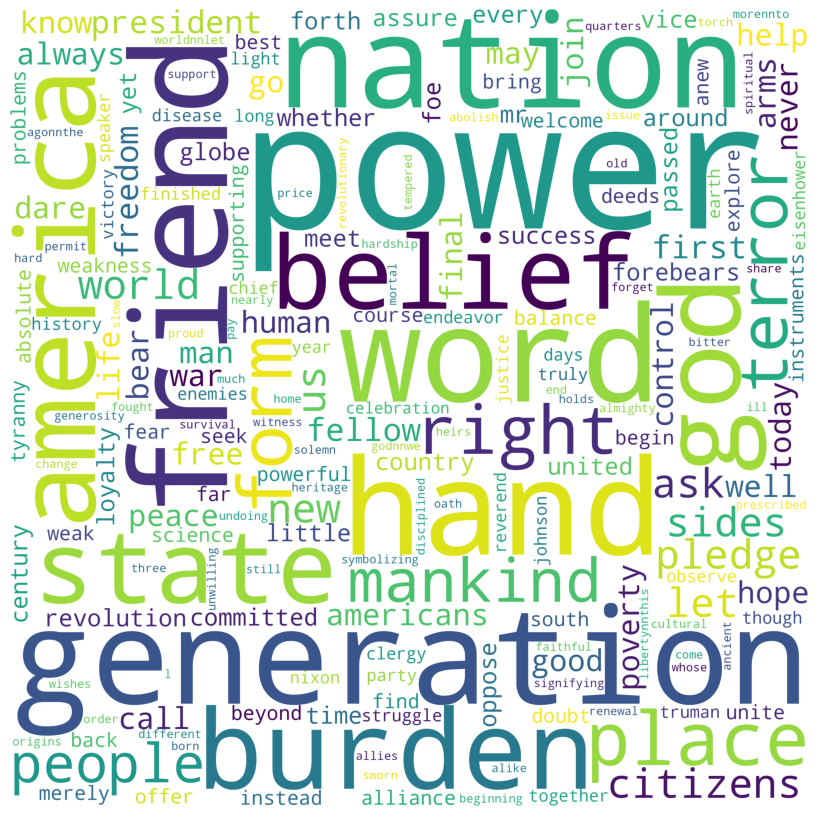

In [323]:
from wordcloud import WordCloud
wordcloud_ken = WordCloud(width = 3000, height = 3000,
                background_color ='white',
                min_font_size = 10, random_state=100).generate(' '.join(top_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_ken)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

print("Word Cloud for Kennedy Speech (after cleaning)!!")
plt.show()

In [353]:
words_nik = [word_tokenize(speech.lower()) for speech in speeches_nik]
all_words_nik = [word for speech_words in words_nik for word in speech_words]
word_frequencies = Counter(all_words_nik)
sorted_frequencies_nik = sorted(word_frequencies.items(), key=lambda x: x[1], reverse=True)
for word, frequency in sorted_frequencies_nik[:3]:
    print(word, frequency)

us 26
new 15
peace 15


In [325]:
top_words_nik = sorted_frequencies_nik
top_words = [word for word, frequency in top_words_nik]

Word Cloud for Nixon Speech (after cleaning)!!


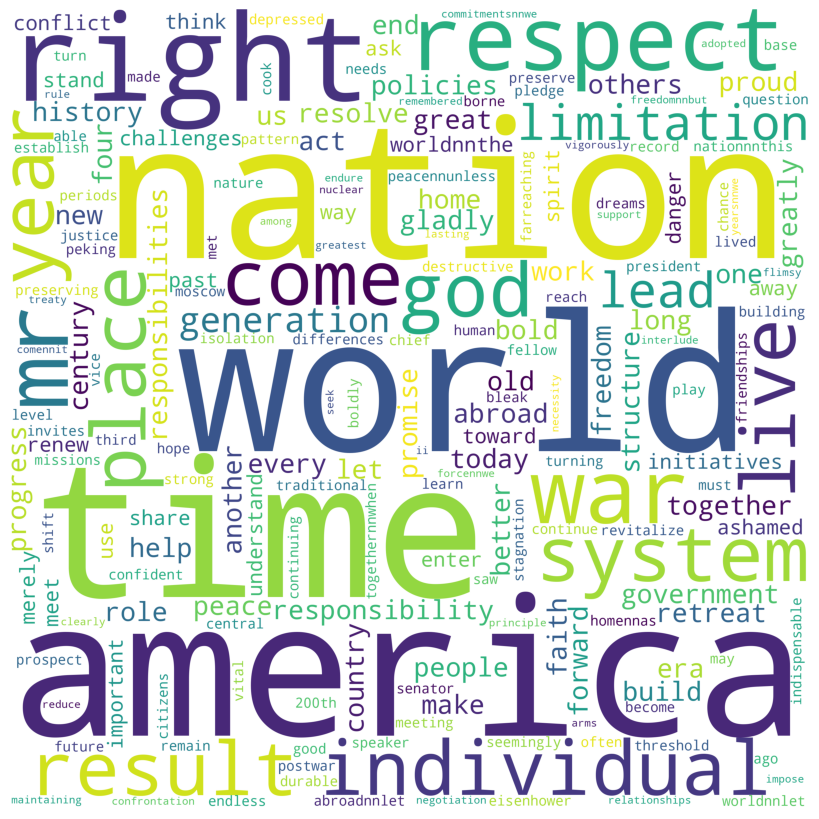

In [326]:
from wordcloud import WordCloud
wordcloud_nik = WordCloud(width = 3000, height = 3000,
                background_color ='white',
                min_font_size = 10, random_state=100).generate(' '.join(top_words))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_nik)
plt.axis("off")
plt.xlabel('Word Cloud')
plt.tight_layout(pad = 0)

print("Word Cloud for Nixon Speech (after cleaning)!!")
plt.show()

In [327]:
print("Word count for Roosevelt speech:")
print("Before stopwords removal:", word_count_roos)
print("After stopwords removal:", len(top_words_roos))
print()

print("Word count for Kennedy speech:")
print("Before stopwords removal:", word_count_ken)
print("After stopwords removal:", len(top_words_ken))
print()

print("Word count for Nixon speech:")
print("Before stopwords removal:", word_count_nik)
print("After stopwords removal:", len(top_words_nik))
print()

Word count for Roosevelt speech:
Before stopwords removal: 1536
After stopwords removal: 446

Word count for Kennedy speech:
Before stopwords removal: 1546
After stopwords removal: 471

Word count for Nixon speech:
Before stopwords removal: 2028
After stopwords removal: 455



In [328]:
tokens_roos = word_tokenize(speech_roos)
tokens_ken = word_tokenize(speech_ken)
tokens_nik = word_tokenize(speech_nik)

In [329]:
filtered_words_roos = [word for word in tokens_roos if word.lower() not in stop and word != '--']
filtered_words_ken = [word for word in tokens_ken if word.lower() not in stop and word != '--']
filtered_words_nik = [word for word in tokens_nik if word.lower() not in stop and word != '--']

In [350]:
print("Sample sentence from Roosevelt speech before removing stopwords:")
sentence_og = ' '.join(tokens_roos[:20])
print(sentence_og)

print("Sample sentence from Roosevelt speech after removing stopwords:")
sample_sentence = ' '.join(filtered_words_roos[:20])
print(sample_sentence)

Sample sentence from Roosevelt speech before removing stopwords:
On each national day of inauguration since 1789 , the people have renewed their sense of dedication to the United
Sample sentence from Roosevelt speech after removing stopwords:
national day inauguration since 1789 , people renewed sense dedication United States . Washington 's day task people create weld
